# Configuração Inicial

## Importação de Bibliotecas

Importação das bibliotecas que serão usadas: pandas para manipulação dos dados, matplotlib.pyplot e seaborn para a geração dos gráficos.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Carregar CSV

In [ ]:
plt.style.use('seaborn-v0_8')
sns.set_theme(context="notebook", style="whitegrid")

df_raw = pd.read_csv('Data Layer\Raw\dados_brutos.csv')
df_raw_temp = df_raw.copy()

## Análise de dados faltantes por coluna

In [24]:
missing_data = pd.DataFrame({
    'Total': len(df_raw),
    'Nulls': df_raw.isnull().sum(),
})

missing_data['% Missing'] = (
    missing_data['Nulls'] / len(df_raw) * 100
).round(2)

missing_data = missing_data.sort_values('% Missing', ascending=False)
missing_data

,Total,Nulls,% Missing
Incomplete Rides Reason,150000,141000,94.0
Incomplete Rides,150000,141000,94.0
Reason for cancelling by Customer,150000,139500,93.0
Cancelled Rides by Customer,150000,139500,93.0
Cancelled Rides by Driver,150000,123000,82.0
Driver Cancellation Reason,150000,123000,82.0
Driver Ratings,150000,57000,38.0
Customer Rating,150000,57000,38.0
Avg CTAT,150000,48000,32.0
Ride Distance,150000,48000,32.0


## Análise de dados repetidos por coluna

In [25]:
duplicados = pd.DataFrame({
    'Singular values': df_raw.nunique(),
    'Repeated Values': df_raw.count() - df_raw.nunique(),
    '% Repeated': (
        (df_raw.count() - df_raw.nunique()) / df_raw.count() * 100
    ).round(2),
}).sort_values('% Repeated', ascending=False)

duplicados

,Singular values,Repeated Values,% Repeated
Booking Status,5,149995,100.00
Cancelled Rides by Driver,1,26999,100.00
Payment Method,5,101995,100.00
Vehicle Type,7,149993,100.00
Cancelled Rides by Customer,1,10499,99.99
Driver Cancellation Reason,4,26996,99.99
Incomplete Rides,1,8999,99.99
Driver Ratings,21,92979,99.98
Customer Rating,21,92979,99.98
Incomplete Rides Reason,3,8997,99.97


In [26]:
total_lines = len(df_raw)
lines_duplicated = df_raw.duplicated().sum()

print(f'Total number of lines: {total_lines}')
print(f'Number of duplicated lines: {lines_duplicated}')

Total number of lines: 150000
Number of duplicated lines: 0


## Análise de horário do agendamento com outras informações

### Rides x Time;

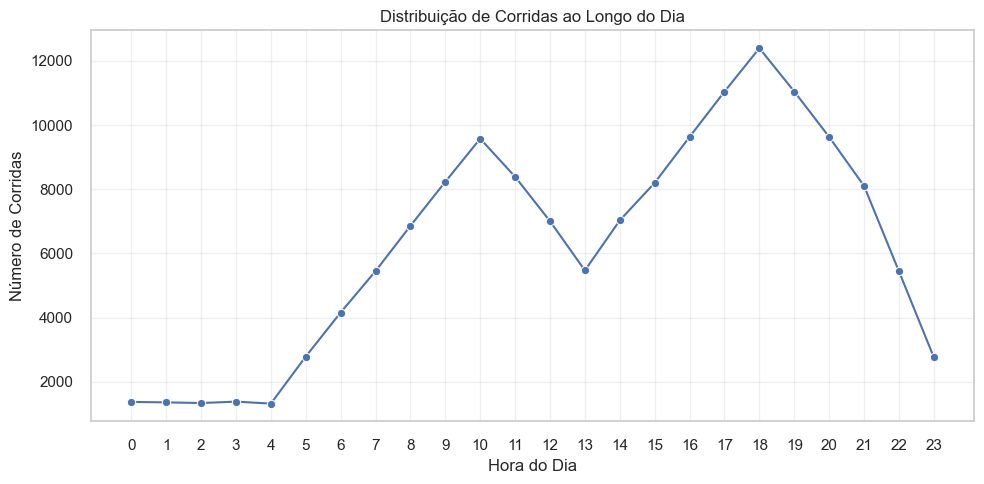

In [27]:
df_raw_temp['Time'] = pd.to_datetime(df_raw_temp['Time'], format='%H:%M:%S', errors='coerce')

df_raw_temp['Hour'] = df_raw_temp['Time'].dt.hour

rides_per_hour = (
    df_raw_temp['Hour']
    .value_counts()
    .sort_index()
    .reset_index()
)

rides_per_hour.columns = ['Hour', 'Número de Corridas']

plt.figure(figsize=(10, 5))
sns.lineplot(data=rides_per_hour, x='Hour', y='Número de Corridas', marker='o')

plt.title('Distribuição de Corridas ao Longo do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Corridas')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Time x Price (Booking Value);

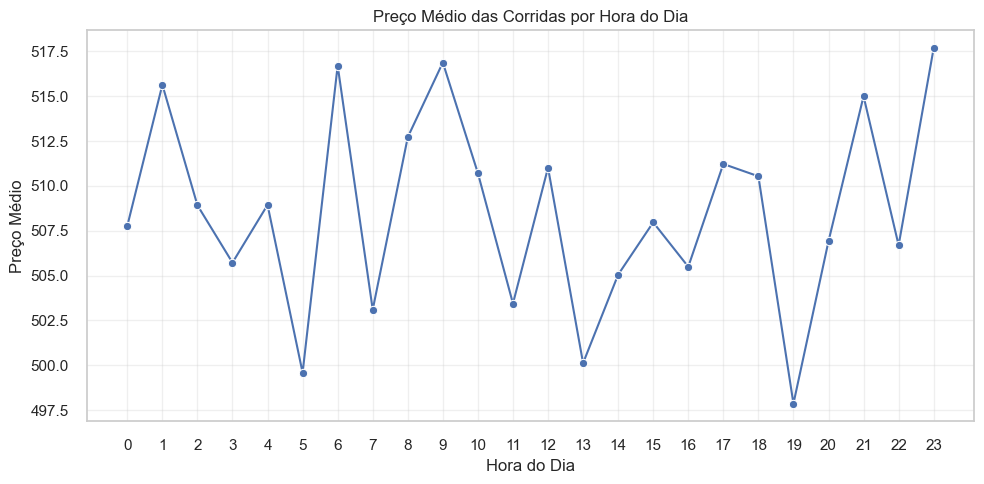

In [28]:
price_per_hour = (
    df_raw_temp
    .groupby('Hour')['Booking Value']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=price_per_hour,
    x='Hour',
    y='Booking Value',
    marker='o'
)

plt.title('Preço Médio das Corridas por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Preço Médio')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Time x Vehicle Type

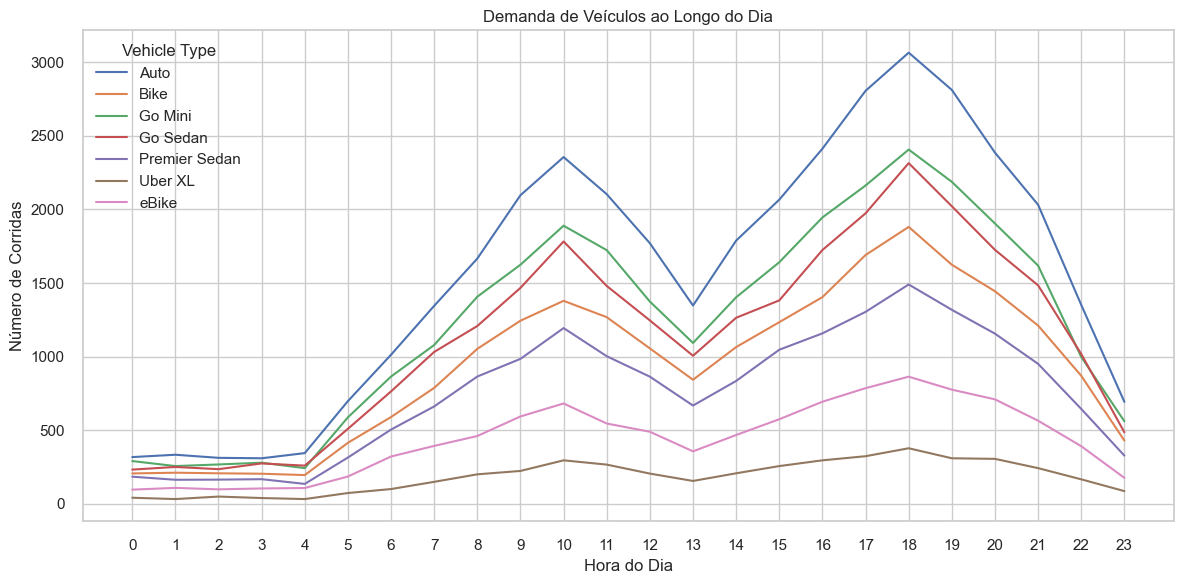

In [29]:
rides_hour_vehicle = (
    df_raw_temp
    .groupby(['Hour', 'Vehicle Type'])
    .size()
    .reset_index(name='Número de Corridas')
)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=rides_hour_vehicle,
    x='Hour',
    y='Número de Corridas',
    hue='Vehicle Type'
)

plt.title('Demanda de Veículos ao Longo do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Corridas')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

### Time x Avg CTAT

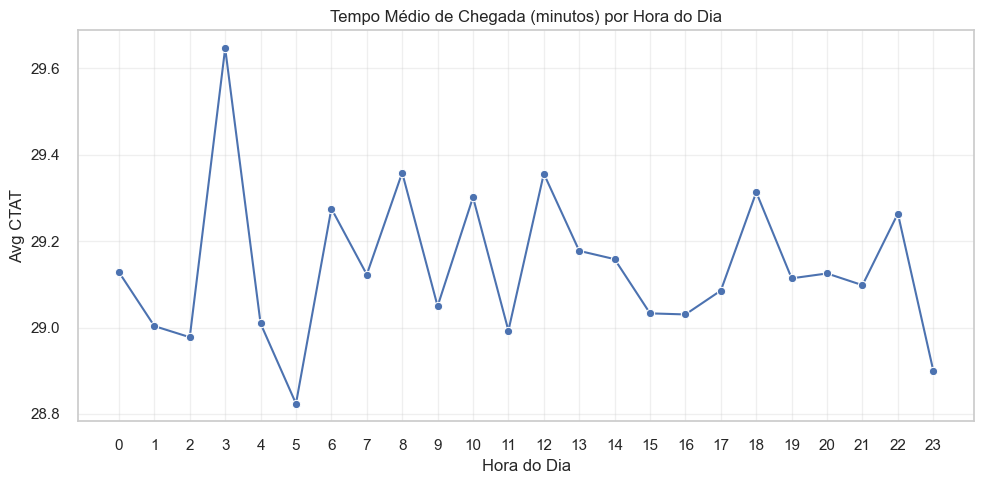

In [30]:
ctat_per_hour = (
    df_raw_temp
    .groupby('Hour')['Avg CTAT']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=ctat_per_hour,
    x='Hour',
    y='Avg CTAT',
    marker='o'
)

plt.title('Tempo Médio de Chegada (minutos) por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Avg CTAT')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

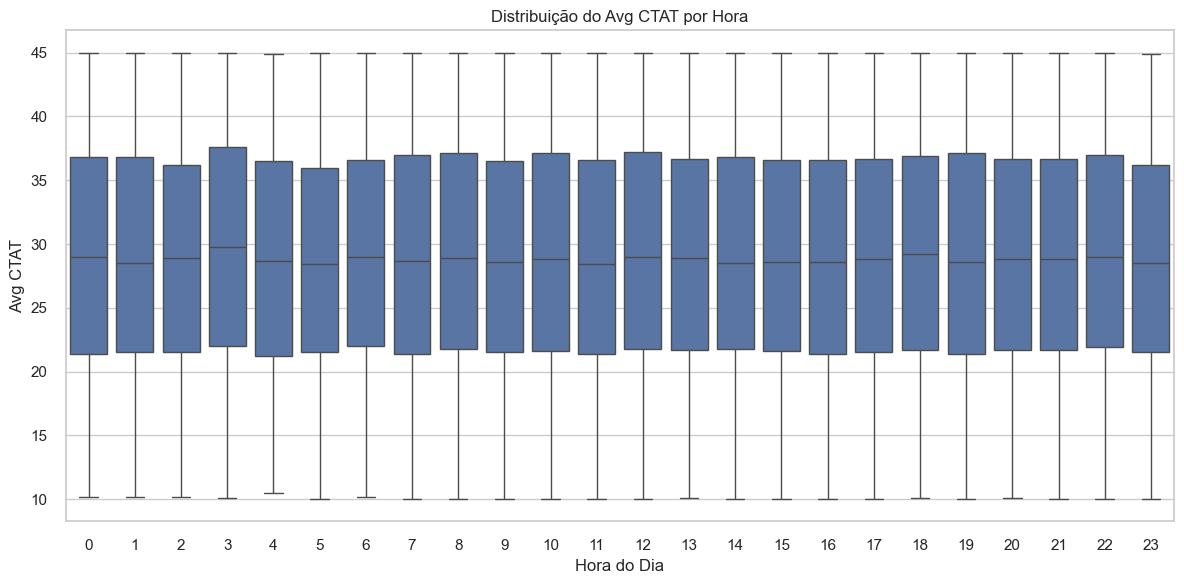

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_raw_temp,
    x='Hour',
    y='Avg CTAT'
)

plt.title('Distribuição do Avg CTAT por Hora')
plt.xlabel('Hora do Dia')
plt.ylabel('Avg CTAT')
plt.tight_layout()
plt.show()

### Time x Pickup Location

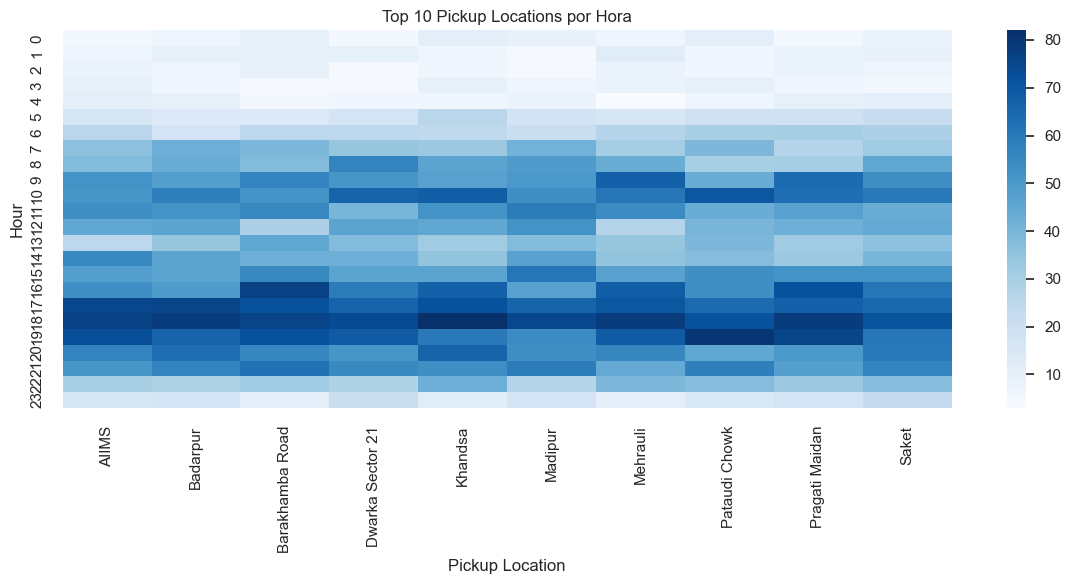

In [32]:
top_locations = df_raw_temp['Pickup Location'].value_counts().head(10).index

df_top = df_raw_temp[df_raw_temp['Pickup Location'].isin(top_locations)]

ct_top = pd.crosstab(
    df_top['Hour'],
    df_top['Pickup Location']
)

plt.figure(figsize=(12, 6))
sns.heatmap(ct_top, cmap='Blues')

plt.title('Top 10 Pickup Locations por Hora')
plt.tight_layout()
plt.show()

### Time x Drop Location

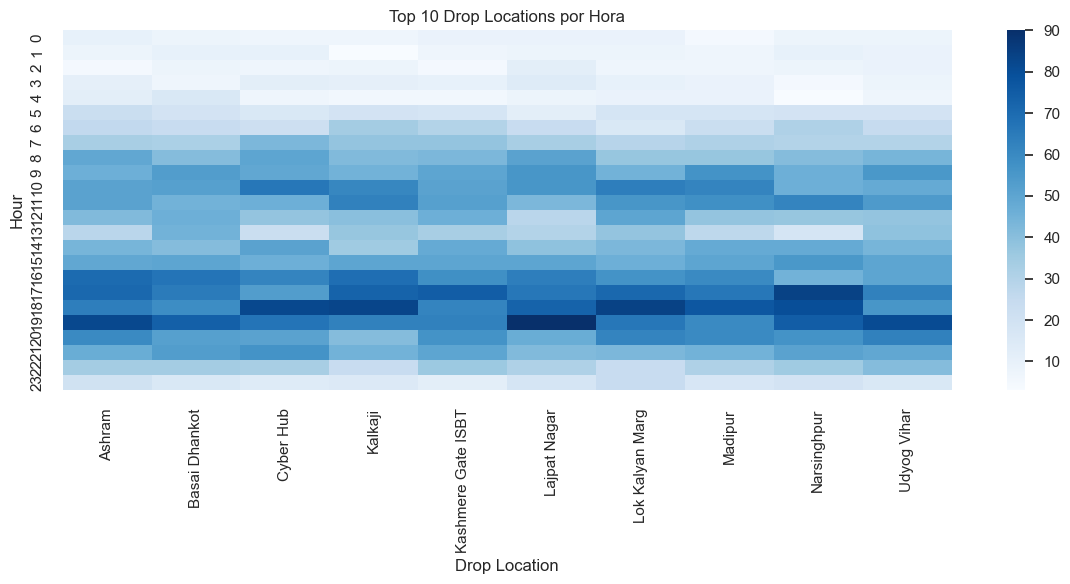

In [33]:
top_locations = df_raw_temp['Drop Location'].value_counts().head(10).index

df_top = df_raw_temp[df_raw_temp['Drop Location'].isin(top_locations)]

ct_top = pd.crosstab(
    df_top['Hour'],
    df_top['Drop Location']
)

plt.figure(figsize=(12, 6))
sns.heatmap(ct_top, cmap='Blues')

plt.title('Top 10 Drop Locations por Hora')
plt.tight_layout()
plt.show()

### Time x Dia de semana

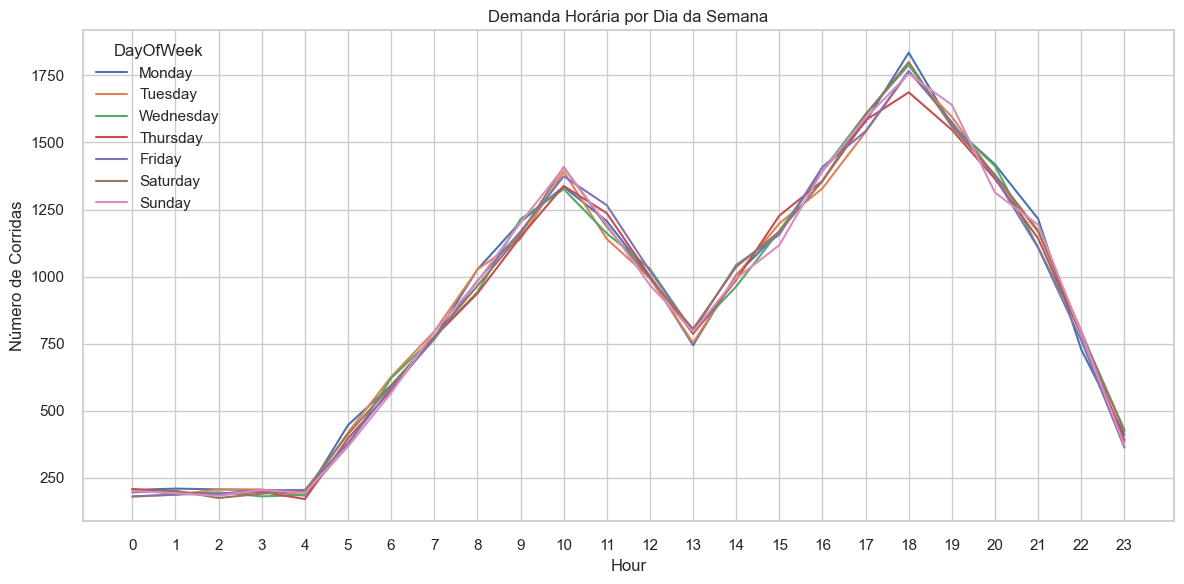

In [34]:
df_raw_temp['Date'] = pd.to_datetime(df_raw_temp['Date'], format='%Y-%m-%d', errors='coerce')
df_raw_temp['DayOfWeek'] = df_raw_temp['Date'].dt.day_name()

order_days = [
    'Monday', 'Tuesday', 'Wednesday',
    'Thursday', 'Friday', 'Saturday', 'Sunday'
]

df_raw_temp['DayOfWeek'] = pd.Categorical(
    df_raw_temp['DayOfWeek'],
    categories=order_days,
    ordered=True
)

rides_hour_day = (
    df_raw_temp
    .groupby(['DayOfWeek', 'Hour'], observed=True)
    .size()
    .reset_index(name='Número de Corridas')
)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=rides_hour_day,
    x='Hour',
    y='Número de Corridas',
    hue='DayOfWeek'
)

plt.title('Demanda Horária por Dia da Semana')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

### Time x Booking Status

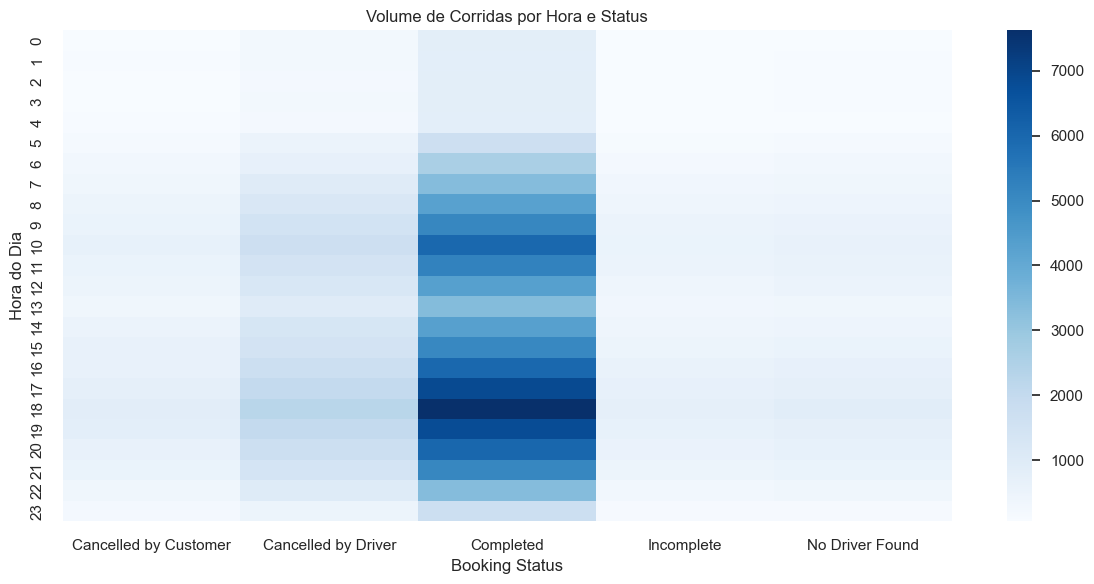

In [35]:
rides_hour_status = (
    df_raw_temp
    .groupby(['Hour', 'Booking Status'], observed=True)
    .size()
    .reset_index(name='Número de Corridas')
)

ct = pd.crosstab(
    df_raw_temp['Hour'],
    df_raw_temp['Booking Status']
)

plt.figure(figsize=(12, 6))
sns.heatmap(ct, cmap='Blues')

plt.title('Volume de Corridas por Hora e Status')
plt.xlabel('Booking Status')
plt.ylabel('Hora do Dia')
plt.tight_layout()
plt.show()

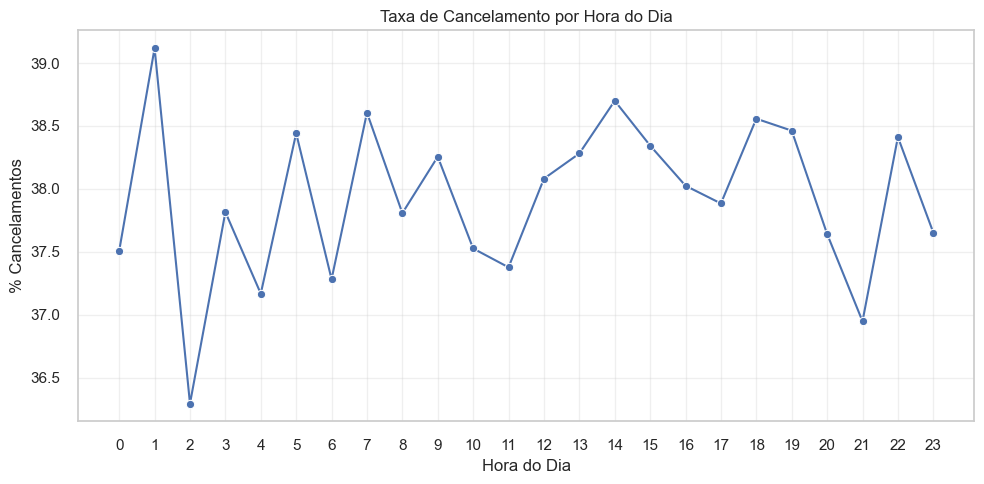

In [36]:
df_raw_temp['Cancelled Flag'] = df_raw_temp['Booking Status'].ne('Completed').astype(int)

cancel_rate_hour = (
    df_raw_temp
    .groupby('Hour', observed=True)['Cancelled Flag']
    .mean()
    .reset_index()
)

cancel_rate_hour['Cancel Rate (%)'] = cancel_rate_hour['Cancelled Flag'] * 100

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=cancel_rate_hour,
    x='Hour',
    y='Cancel Rate (%)',
    marker='o'
)

plt.title('Taxa de Cancelamento por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('% Cancelamentos')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Análise de estado do agendamento

### Booking Status x Vehicle Type

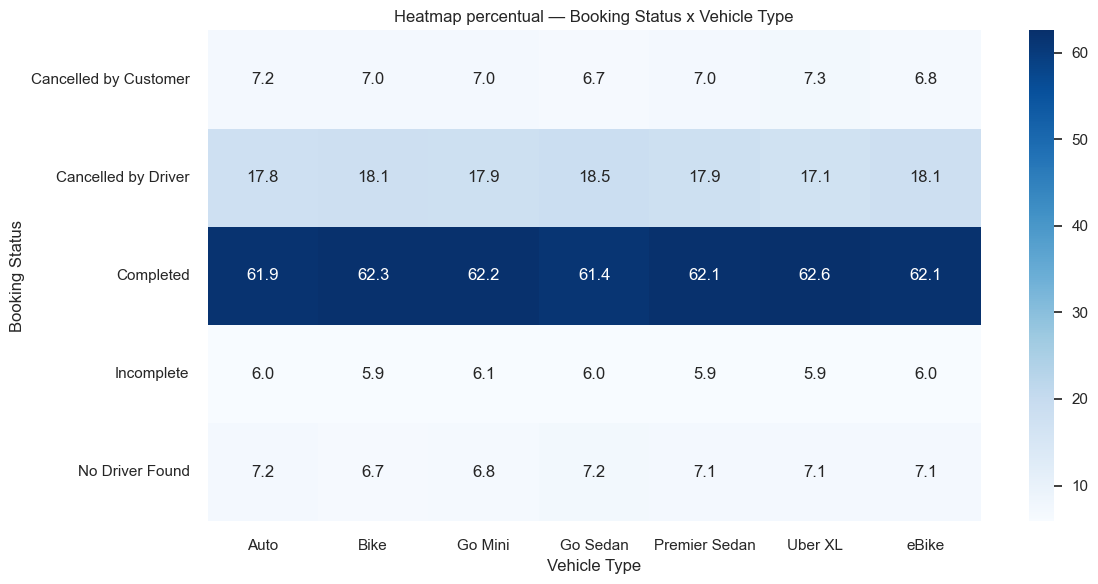

In [37]:
bookingXvehicle = pd.crosstab(
    df_raw_temp['Booking Status'],
    df_raw_temp['Vehicle Type']
)

tabela_pct = bookingXvehicle.div(bookingXvehicle.sum(axis=0), axis=1) * 100

plt.figure(figsize=(12, 6))

sns.heatmap(
    tabela_pct,
    annot=True,
    fmt=".1f",
    cmap="Blues"
)

plt.title('Heatmap percentual — Booking Status x Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Booking Status')
plt.tight_layout()
plt.show()


## Análise da quantidade de corridas por usuário

### Customer ID x Amount of Rides

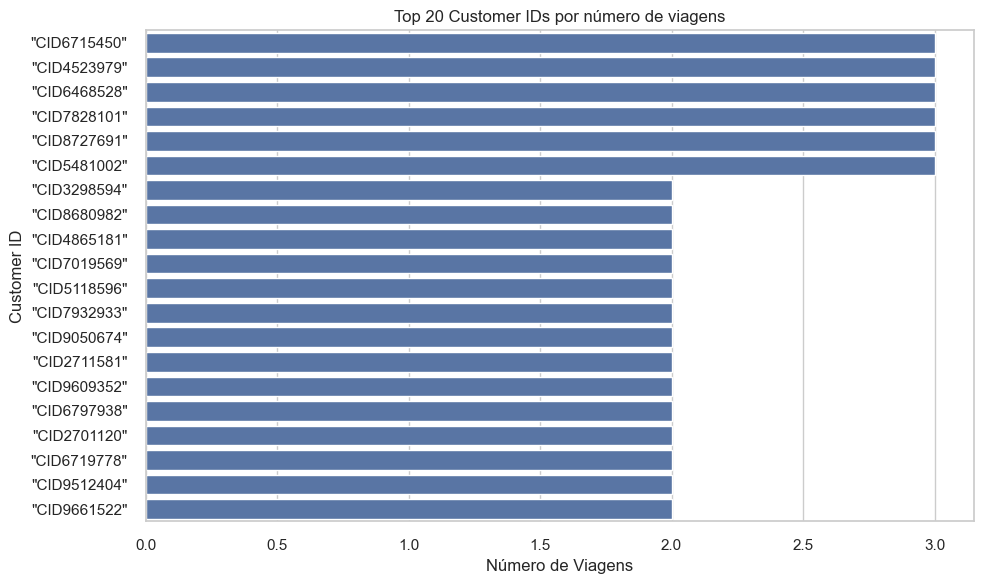

In [38]:
top_customers = (
    df_raw['Customer ID']
    .value_counts()
    .head(20)
    .reset_index()
)

top_customers.columns = ['Customer ID', 'Número de Viagens']

plt.figure(figsize=(10, 6))

sns.barplot(
    data=top_customers,
    y='Customer ID',
    x='Número de Viagens'
)

plt.title('Top 20 Customer IDs por número de viagens')
plt.xlabel('Número de Viagens')
plt.ylabel('Customer ID')
plt.tight_layout()
plt.show()

## Análise de tipo de veículo

### Vehicle Type x Ride Distance 

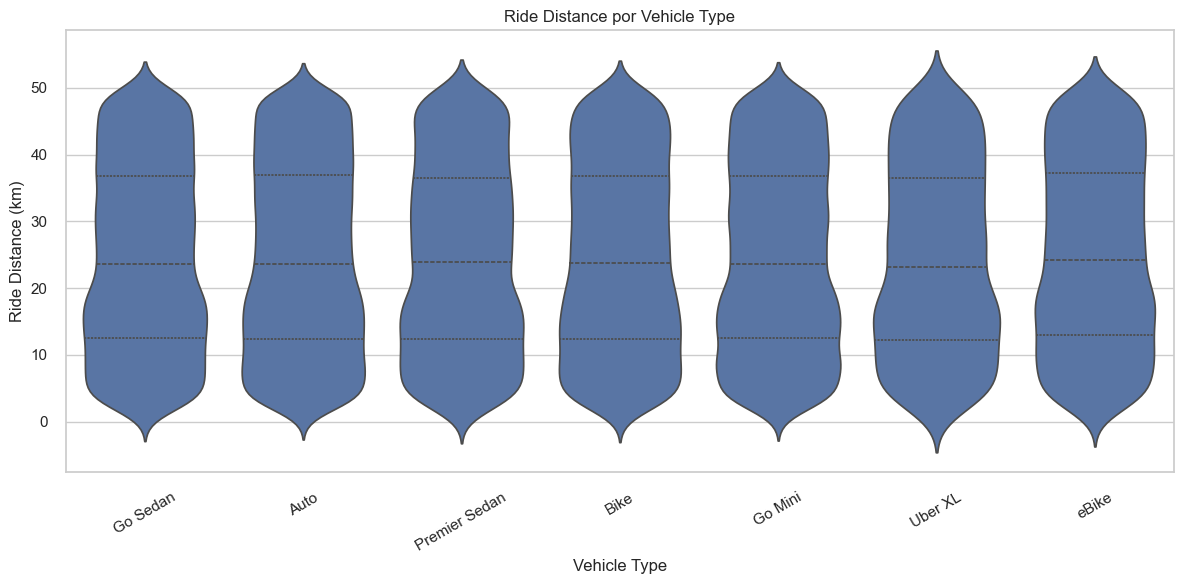

In [39]:
df_raw_temp['Ride Distance'] = pd.to_numeric(df_raw_temp['Ride Distance'], errors='coerce')

df_plot = df_raw_temp.dropna(subset=['Vehicle Type', 'Ride Distance'])

plt.figure(figsize=(12, 6))

sns.violinplot(
    data=df_plot,
    x='Vehicle Type',
    y='Ride Distance',
    inner='quartile'
)

plt.title('Ride Distance por Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Ride Distance (km)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

### Vehicle Type x Avg CTAT

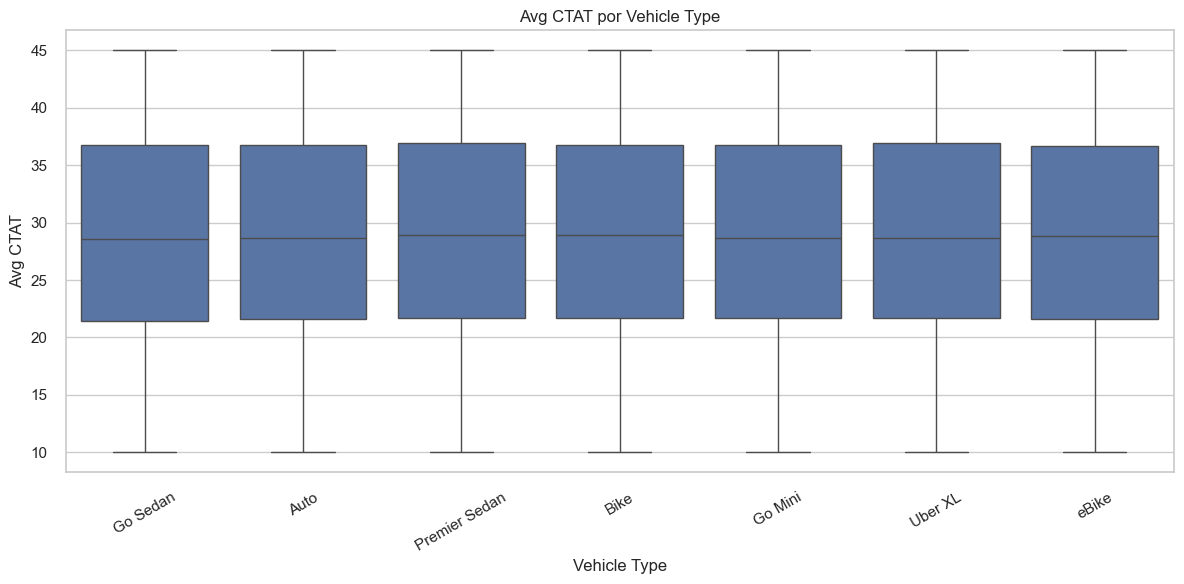

In [40]:
df_raw_temp['Ride Distance'] = pd.to_numeric(df_raw_temp['Ride Distance'], errors='coerce')

df_plot = df_raw_temp.dropna(subset=['Vehicle Type', 'Avg CTAT'])

plt.figure(figsize=(12, 6))

sns.boxplot(
    data=df_plot,
    x='Vehicle Type',
    y='Avg CTAT'
)

plt.title('Avg CTAT por Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Avg CTAT')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

### Vehicle Type x Price

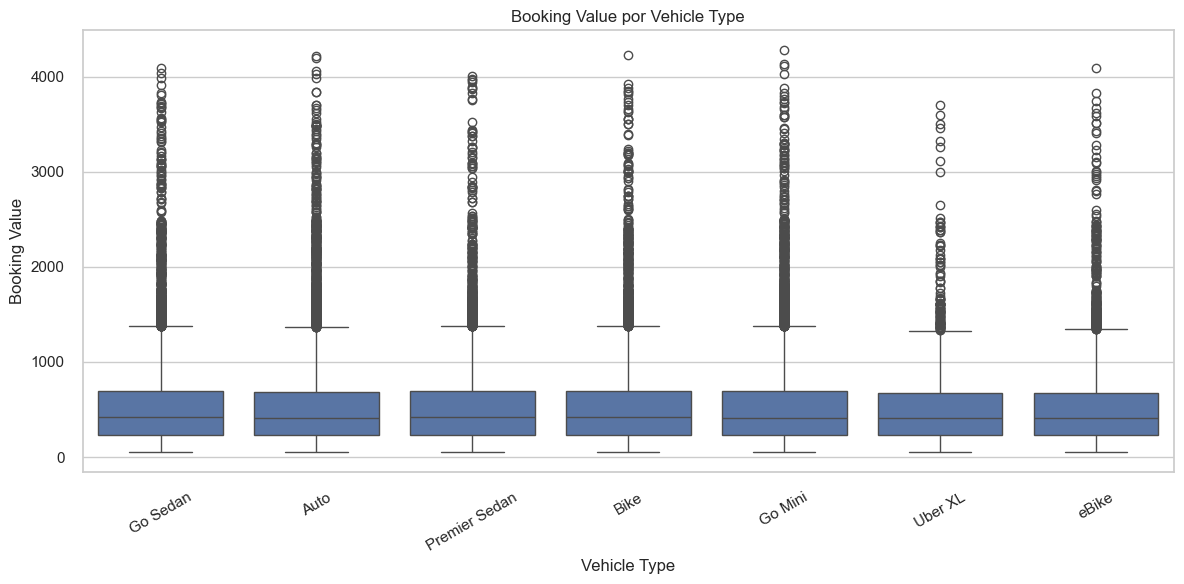

In [41]:
df_raw_temp['Price'] = pd.to_numeric(df_raw_temp['Booking Value'], errors='coerce')

df_plot = df_raw_temp.dropna(subset=['Vehicle Type', 'Booking Value'])

plt.figure(figsize=(12, 6))

sns.boxplot(
    data=df_plot,
    x='Vehicle Type',
    y='Booking Value'
)

plt.title('Booking Value por Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Booking Value')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

### Vehicle Type x Incomplete Rides Reason

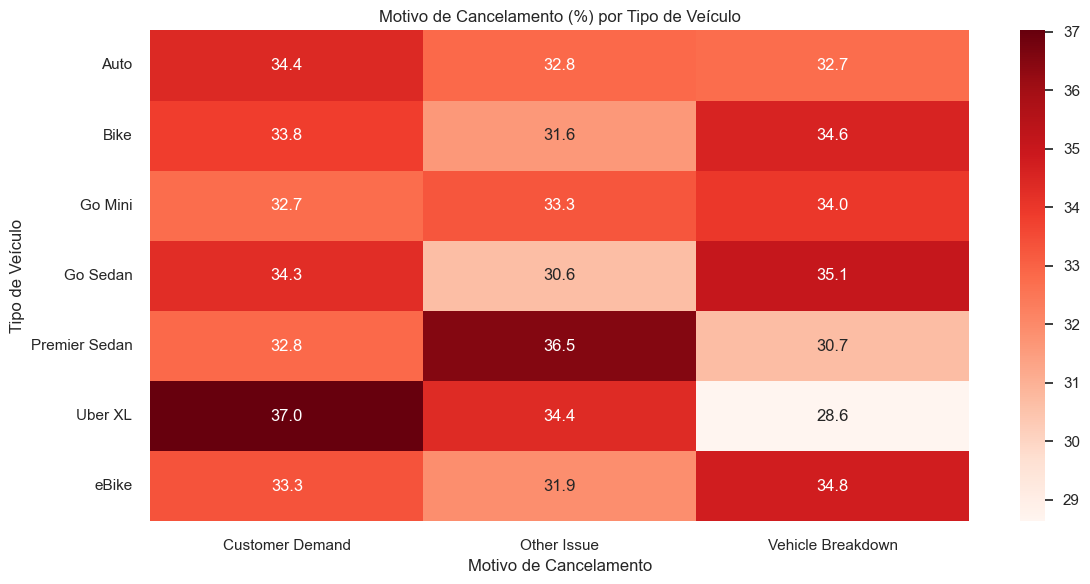

In [42]:
cancelled = df_raw[df_raw['Booking Status'] != 'Completed']

# Tabela de contingência
ct = pd.crosstab(
    cancelled['Vehicle Type'],
    cancelled['Incomplete Rides Reason'],
    normalize='index'  # percentual por tipo de veículo
) * 100

plt.figure(figsize=(12, 6))
sns.heatmap(ct, annot=True, fmt='.1f', cmap='Reds')

plt.title('Motivo de Cancelamento (%) por Tipo de Veículo')
plt.xlabel('Motivo de Cancelamento')
plt.ylabel('Tipo de Veículo')
plt.tight_layout()
plt.show()

### Vehicle Type x Incomplete Rides

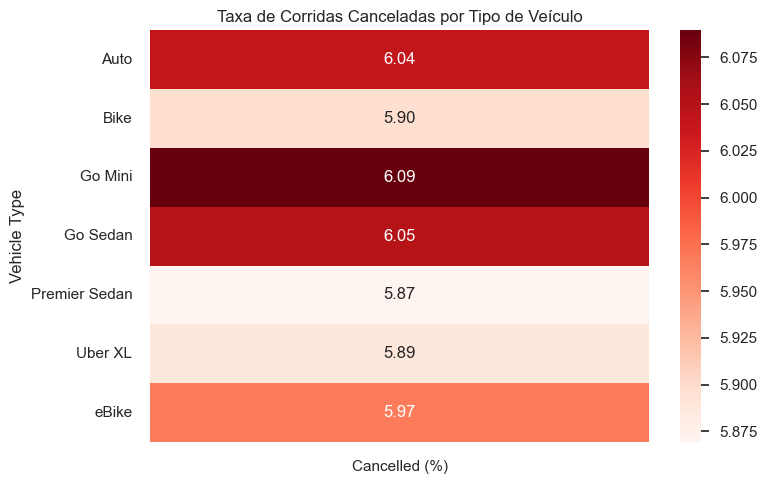

In [43]:
df_raw['Incomplete Flag'] = df_raw['Incomplete Rides'].fillna(0)

ct = pd.crosstab(
    df_raw['Vehicle Type'],
    df_raw['Incomplete Flag'],
    normalize='index'
) * 100

ct.columns = ['Completed (%)', 'Cancelled (%)']

plt.figure(figsize=(8, 5))
sns.heatmap(ct[['Cancelled (%)']], annot=True, fmt='.2f', cmap='Reds')

plt.title('Taxa de Corridas Canceladas por Tipo de Veículo')
plt.ylabel('Vehicle Type')
plt.xlabel('')
plt.tight_layout()
plt.show()

## Análise do local de embarque

### Pickup Location x Booking Status

### Pickup Location x Price

### Pickup Location x AvgCTAT

## Análise Booking Value x Booking Status

## Análise Ride Distance x Booking Status

## Análise Customer Rating x Driver Rating

## Payment Method x Price

## Análise de Outliers